

## Considerações Iniciais:

    1) O objetivo é calcular a probabilidade de precipitação logo, não importa saber a quantidade em milímetro. Entretanto, um dataset com essas features pode ser útil de várias formas, por exemplo:
        - Apenas saber se vai chover já é util para o setor de entrega e indica que deverá ter maior frota 
        circulando assim, podemos criar um alerta aos colaboratores para aumentar o efetivo na área operacional,
        - Para a defesa civil, classificando por tipo de chuva (Muito forte, Forte, Normal, Fraca...) 
        para possível posicionamento das equipes e logística de prestação de serviços,
        - Saber a quantidade, pode ajudar em diversas atividades, como agricultura pois, dependendo do tipo de
        plantação será necessário de uma determinada quantidade de água,
        - Coletar as temperaturas médias dos últimos anos serve para determinar se a região pode ter criação
        de uma determinada espécie de animal.
        
    2) Vamos considerar que não há outilier (Em um trabalho real além de buscar por outliers, provavelmente entraria em contato com especialistas que dominam o problema para uma melhor compreensão dos dados e quais features são mais representativas) 
    
    3) Todos os insight estão penalizados pelos 50% de dados faltantes.
    

    
## Insight:
   - De novembro a janeiro é o melhor período para capitação de água nessa localidade <a href='#insight01'>link</a> 
   - Em setembro temos o menor indice de chuva, com apenas em 3 dias de chuva no mês. <a href='#insight02'>link</a> 
   - Os meses de Maio e de Agosto têm menores temperaturas. <a href='#insight03'>link</a> 
   - O ano de 2018 apresentou uma queda de 44,47% do total de chuva em relação ao ano de 2017. <a href='#insight04'>link</a>
   - Observa-se que em setembro de 2017 houve uma evaporação piche quase duas vezes(x1.84) maior que de 2018. <a href='#insight03'>link</a>
   - Observa-se tambem que há um comportamento cíclico das feature das medias anuais . <a href='#insight06'>link</a>
   

# 1) Análise Exploratória de Dados


In [7]:
%matplotlib inline
import numpy as numpy
import matplotlib.pyplot as plt
import pandas as pd
import colorsys
plt.style.use('seaborn-talk')

dfdd = pd.read_csv('dados_diarios_semcab.txt', sep=";")
dfdd.drop(['Unnamed: 11','Estacao'], inplace=True, axis=1) # limpeza de colunas sem informação

dfdh = pd.read_csv("dados_horarios_semcab.txt", sep = ";")
dfdh.drop(['Unnamed: 9','Unnamed: 10'], inplace=True, axis=1) # limpeza da coluna sem informação
dfdh.to_csv("dhinter.csv")

### dataset dados_diarios :

In [8]:
dfdd.head(15)

,Data,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media
0,01/01/2017,0,NaN,31.7,NaN,8.5,6.1,25.20,66.0,3.466667
1,01/01/2017,1200,0.0,NaN,18.1,NaN,NaN,NaN,NaN,NaN
2,02/01/2017,0,NaN,31.3,NaN,5.6,6.3,23.96,83.0,2.900000
3,02/01/2017,1200,16.0,NaN,18.1,NaN,NaN,NaN,NaN,NaN
4,03/01/2017,0,NaN,31.3,NaN,7.0,4.5,23.10,87.0,3.000000
5,03/01/2017,1200,3.7,NaN,19.2,NaN,NaN,NaN,NaN,NaN
6,04/01/2017,0,NaN,30.3,NaN,4.2,3.5,25.14,64.0,2.050000
7,04/01/2017,1200,5.0,NaN,18.8,NaN,NaN,NaN,NaN,NaN
8,05/01/2017,0,NaN,31.2,NaN,6.1,5.6,25.90,62.0,1.650000
9,05/01/2017,1200,0.0,NaN,21.9,NaN,NaN,NaN,NaN,NaN


In [4]:
dfdd

,Data,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media
0,01/01/2017,0,NaN,31.7,NaN,8.5,6.1,25.20,66.00,3.466667
1,01/01/2017,1200,0.0,NaN,18.1,NaN,NaN,NaN,NaN,NaN
2,02/01/2017,0,NaN,31.3,NaN,5.6,6.3,23.96,83.00,2.900000
3,02/01/2017,1200,16.0,NaN,18.1,NaN,NaN,NaN,NaN,NaN
4,03/01/2017,0,NaN,31.3,NaN,7.0,4.5,23.10,87.00,3.000000
...,...,...,...,...,...,...,...,...,...,...
1457,30/12/2018,1200,0.0,NaN,19.1,NaN,NaN,NaN,NaN,NaN
1458,31/12/2018,0,NaN,31.0,NaN,NaN,5.2,24.20,66.00,2.633333
1459,31/12/2018,1200,0.0,NaN,19.1,NaN,NaN,NaN,NaN,NaN
1460,01/01/2019,0,NaN,31.8,NaN,NaN,4.2,24.48,79.25,2.300000


#### É notório o elevado caso de <i>missing values</i> em dados_diarios
Para valores ausentes temos duas escolhas, a mais simplista que é a eliminacao dessas linhas (geralmente não
usada por perda de informação na etapa de apredizado)
ou o preenchimento, essa segunda escolha apresenta todo um estudo acadêmico
muitas vezes usando a própria aprendizagem de máquina (impossivel nesse caso, pois a maioria dos NaN estão no Target, o que seria a propria classifição final dos dados) para essa tarefa,
na prática, as pessoas usam média, mediana, enfim o que não faz muito sentido para esse dados.

Na prática um dataset com 50% dos valores de target com missing buscaríamos um dataset mais confiavel pois,
não é possivel extrair informação de onde não existe. Em outras features é aceitável as técnicas mencionadas acima
Mas como é apenas um teste, justamente para ver o tramento dos dados vamos continuar usando. Porém se eliminarmos todas as linhas com NaN teremos duas consequências: perderíamos quase toda informação do dataset dados_diarios e com o menor número de instâncias, pior desempenho nos algorítmos de aprendizagem.

### dataset dados_horarios :

In [3]:
dfdh.head(15)

,Estacao,Data,Hora,TempBulboSeco,TempBulboUmido,UmidadeRelativa,PressaoAtmEstacao,DirecaoVento,VelocidadeVentoNebulosidade
0,83781,01/01/2017,0,26.8,21.5,61,923.4,5,2.1
1,83781,01/01/2017,1200,26.2,21.2,63,924.7,32,3.3
2,83781,01/01/2017,1800,31.5,22.4,45,923.3,32,4.6
3,83781,02/01/2017,0,25.0,22.1,78,924.2,32,2.5
4,83781,02/01/2017,1200,24.8,21.3,72,924.2,5,3.3
5,83781,03/01/2017,0,22.8,21.5,89,922.8,23,2.5
6,83781,03/01/2017,1200,24.6,21.5,76,925.1,14,3.0
7,83781,04/01/2017,0,20.2,19.5,93,923.7,23,3.0
8,83781,04/01/2017,1200,22.6,19.5,75,924.3,23,1.6
9,83781,05/01/2017,0,27.0,21.3,56,923.6,32,2.5


In [23]:
dfdh

,Estacao,Data,Hora,TempBulboSeco,TempBulboUmido,UmidadeRelativa,PressaoAtmEstacao,DirecaoVento,VelocidadeVentoNebulosidade
0,83781,01/01/2017,0,26.8,21.5,61,923.4,5,2.1
1,83781,01/01/2017,1200,26.2,21.2,63,924.7,32,3.3
2,83781,01/01/2017,1800,31.5,22.4,45,923.3,32,4.6
3,83781,02/01/2017,0,25.0,22.1,78,924.2,32,2.5
4,83781,02/01/2017,1200,24.8,21.3,72,924.2,5,3.3
...,...,...,...,...,...,...,...,...,...
2088,83781,31/12/2018,1200,24.0,19.7,67,923.6,9,1.0
2089,83781,31/12/2018,1800,30.1,22.1,47,922.8,9,3.3
2090,83781,01/01/2019,0,23.4,20.3,75,923.1,9,3.6
2091,83781,01/01/2019,1200,26.3,21.8,66,926.4,9,1.6


### Tipos de dados

In [6]:
dfdd.dtypes

Data                          object
Hora                           int64
Precipitacao                 float64
TempMaxima                   float64
TempMinima                   float64
Insolacao                    float64
Evaporacao Piche             float64
Temp Comp Media              float64
Umidade Relativa Media       float64
Velocidade do Vento Media    float64
dtype: object

In [5]:
dfdh.dtypes

Estacao                          int64
Data                            object
Hora                             int64
TempBulboSeco                  float64
TempBulboUmido                 float64
UmidadeRelativa                  int64
PressaoAtmEstacao              float64
DirecaoVento                     int64
VelocidadeVentoNebulosidade    float64
dtype: object

Nota-se que a data está como Object e hora como int teremos que transformar em datatime para facilitar as consultas futuras


### Análise dos missing values


In [4]:
dfdd.isna().sum() 

Data                           0
Hora                           0
Precipitacao                 731
TempMaxima                   731
TempMinima                   731
Insolacao                    793
Evaporacao Piche             731
Temp Comp Media              731
Umidade Relativa Media       732
Velocidade do Vento Media    731
dtype: int64

In [9]:
dfnan = dfdd.copy()
dfnan.dropna(inplace=True)
dfnan.count()

Data                         0
Hora                         0
Precipitacao                 0
TempMaxima                   0
TempMinima                   0
Insolacao                    0
Evaporacao Piche             0
Temp Comp Media              0
Umidade Relativa Media       0
Velocidade do Vento Media    0
dtype: int64

In [14]:

valorDeLinhaNulas = len(dfdd) - len(dfnan)

print("Total de linha com algum valor faltante: ",valorDeLinhaNulas) 

Total de linha com algum valor faltante:  1462


#### Como visto acima em dados_diarios não existe nenhuma tupla sem pelo menos um missing value
Absurdamente, todas as linhas apresentam valores ausentes, ok é apenas um teste...

Técnicas mais simplistas de eliminação dos valores ausentes já não funcionariam pela grande quantidade de valores
como visto anteriormente, mas, na verdade, todas as linhas apresentam pelo menos um valor faltante
ficando claro que com essa estratégia de eliminação das linhas com valore faltantes não sobraria nenhuma linha.

Essa estratégia só funciana com poucos valores faltantes e se esses valores ausentes são
totalmente randômicos, ou seja, considerando que temos <i>"Missing completely at random"</i>
temos casos em que essa falta de informação tem que ser levada em consideração
como em features de salário, os valores faltantes são relevantes e tem ganho de informação.....

### Análise de correlação
Foi aplicado o método de Pearson que é o padrão do pandas

In [12]:
dfdh.corr()

,Estacao,Hora,TempBulboSeco,TempBulboUmido,UmidadeRelativa,PressaoAtmEstacao,DirecaoVento,VelocidadeVentoNebulosidade
Estacao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hora,NaN,1.000000,0.353830,0.104709,-0.454676,-0.059625,0.118496,0.168924
TempBulboSeco,NaN,0.353830,1.000000,0.794577,-0.664367,-0.545905,0.158974,-0.055781
TempBulboUmido,NaN,0.104709,0.794577,1.000000,-0.093502,-0.646170,0.073343,-0.098108
UmidadeRelativa,NaN,-0.454676,-0.664367,-0.093502,1.000000,0.107548,-0.162394,-0.031184
PressaoAtmEstacao,NaN,-0.059625,-0.545905,-0.646170,0.107548,1.000000,-0.166908,0.012237
DirecaoVento,NaN,0.118496,0.158974,0.073343,-0.162394,-0.166908,1.000000,0.209886
VelocidadeVentoNebulosidade,NaN,0.168924,-0.055781,-0.098108,-0.031184,0.012237,0.209886,1.000000


In [13]:
dfdd.corr()

,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media
Hora,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Precipitacao,NaN,1.000000,NaN,0.141411,NaN,NaN,NaN,NaN,NaN
TempMaxima,NaN,NaN,1.000000,NaN,0.569471,0.367892,0.911184,-0.465957,-0.257131
TempMinima,NaN,0.141411,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
Insolacao,NaN,NaN,0.569471,NaN,1.000000,0.293203,0.348764,-0.697167,-0.127297
Evaporacao Piche,NaN,NaN,0.367892,NaN,0.293203,1.000000,0.276919,-0.395270,-0.007477
Temp Comp Media,NaN,NaN,0.911184,NaN,0.348764,0.276919,1.000000,-0.313219,-0.237274
Umidade Relativa Media,NaN,NaN,-0.465957,NaN,-0.697167,-0.395270,-0.313219,1.000000,0.151834
Velocidade do Vento Media,NaN,NaN,-0.257131,NaN,-0.127297,-0.007477,-0.237274,0.151834,1.000000


### Análise de distribuição e estatística das variáveis


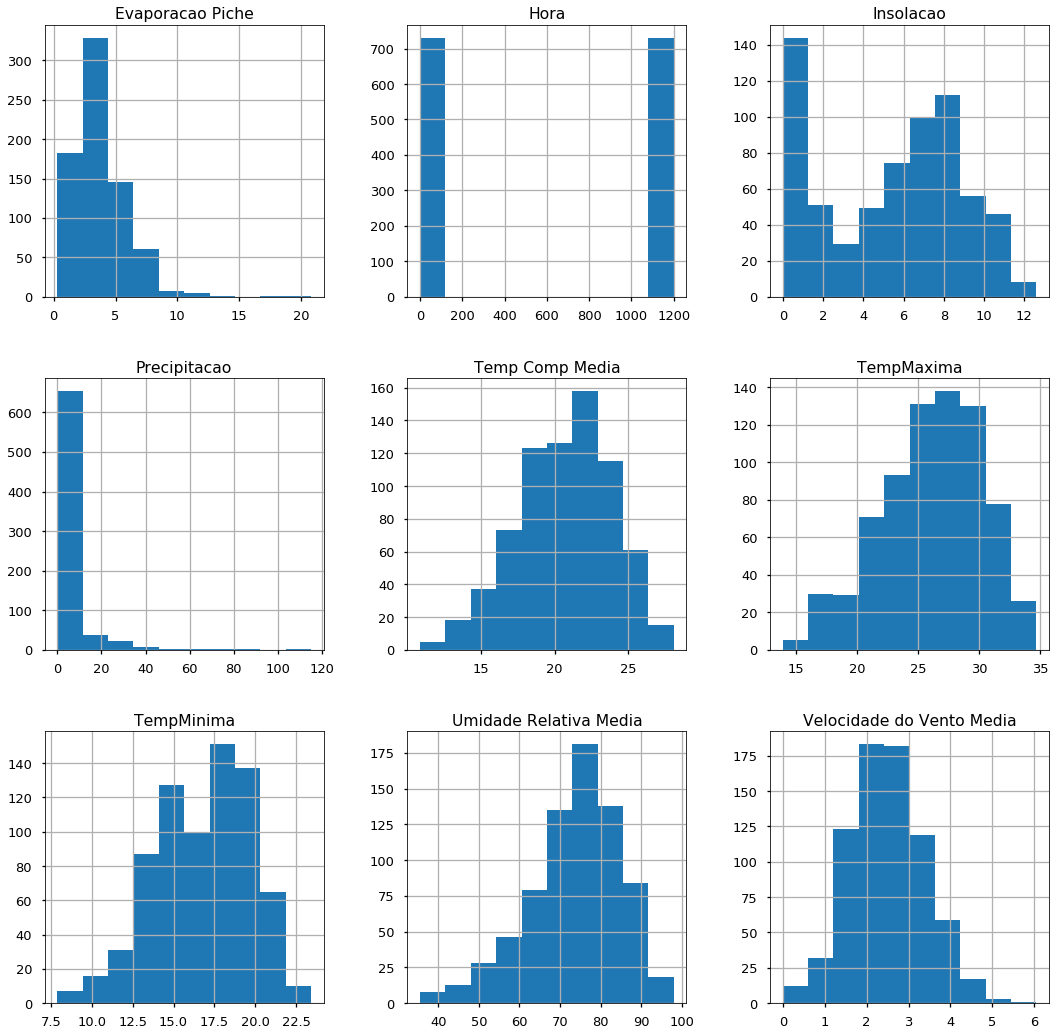

In [5]:
dfdd.hist(figsize=(18,18))
plt.show()

In [24]:
dfdd.describe()

,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media
count,1462.000000,731.000000,731.000000,731.000000,669.000000,731.000000,731.000000,730.000000,731.000000
mean,600.000000,3.901642,26.120793,16.743639,5.361883,3.788098,20.682873,73.644521,2.493617
std,600.205304,10.605123,4.127646,2.895703,3.516709,2.115541,3.172709,11.298550,0.891443
min,0.000000,0.000000,13.900000,7.900000,0.000000,0.300000,10.900000,35.500000,0.000000
25%,0.000000,0.000000,23.300000,14.600000,1.900000,2.400000,18.530000,67.500000,1.900000
50%,600.000000,0.000000,26.400000,17.100000,6.000000,3.500000,20.920000,74.500000,2.466667
75%,1200.000000,2.000000,29.200000,19.000000,8.200000,4.850000,23.050000,81.750000,3.066667
max,1200.000000,115.000000,34.700000,23.400000,12.600000,20.800000,28.060000,98.000000,6.050000


Podemos notar que o desvio padrão das colunas é relativamente baixo com exeção da "Precipitacao" e "Umidade Relativa Media" além disso, nota-se também o desbalanceamento da "Precipitacao". Os valores máximo e mínino fazendo uma análise superficial, não aparenta ter outlier e nem valores impossíveis.

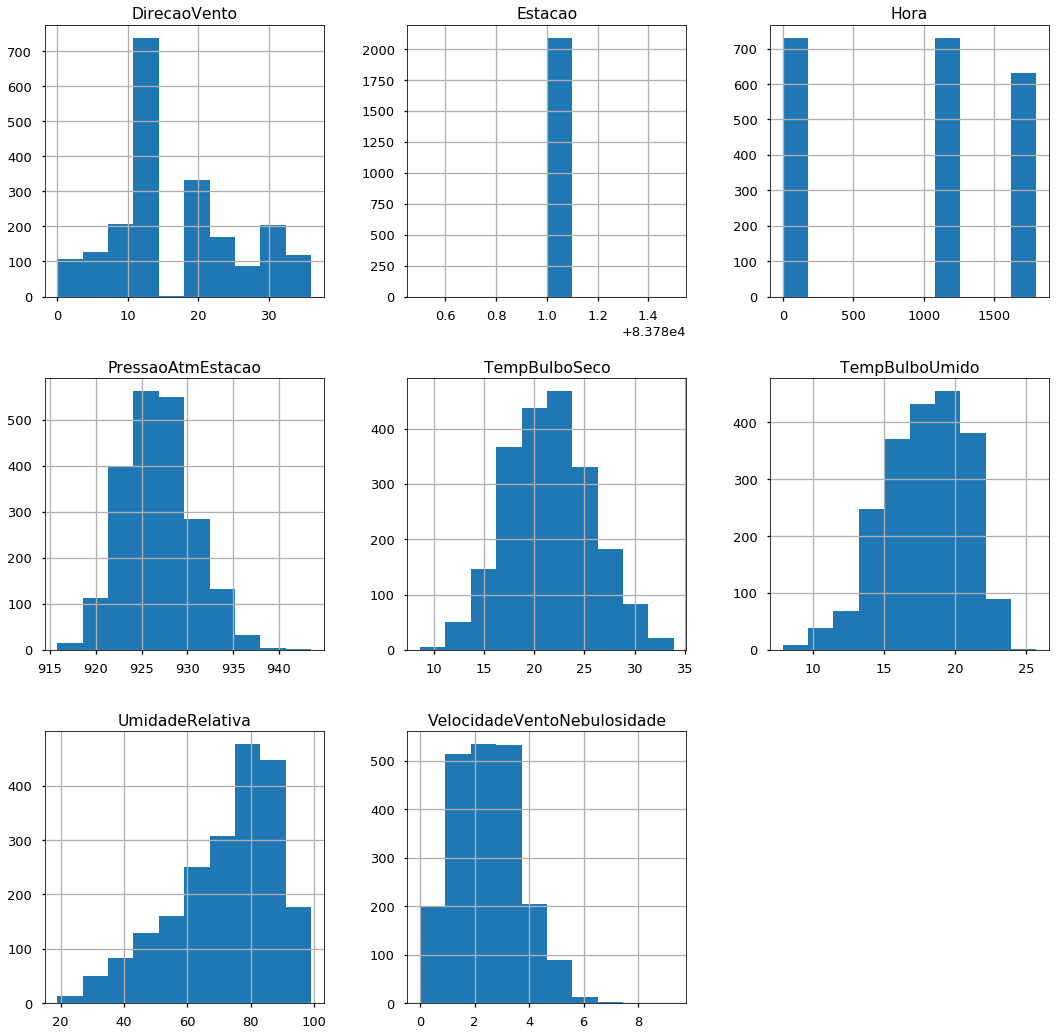

In [38]:
dfdh.hist(figsize=(18,18))
plt.show()

In [25]:
dfdh.describe()

,Estacao,Hora,TempBulboSeco,TempBulboUmido,UmidadeRelativa,PressaoAtmEstacao,DirecaoVento,VelocidadeVentoNebulosidade
count,2093.0,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000
mean,83781.0,961.777353,21.528237,17.882752,71.584329,926.833731,17.145724,2.502949
std,0.0,744.971090,4.252234,2.896431,16.307636,3.771916,9.087701,1.257839
min,83781.0,0.000000,8.600000,7.900000,19.000000,915.800000,0.000000,0.000000
25%,83781.0,0.000000,18.400000,15.800000,62.000000,924.100000,14.000000,1.600000
50%,83781.0,1200.000000,21.400000,18.100000,76.000000,926.700000,14.000000,2.500000
75%,83781.0,1800.000000,24.400000,20.200000,84.000000,929.200000,23.000000,3.300000
max,83781.0,1800.000000,33.900000,25.700000,99.000000,943.500000,36.000000,9.300000


#### Resumo:
    
- "Evaporacao Piche" tem 731 (50.0%) <i>missing values</i>
- "Insolacao" tem 81 (5.5%) zeros	
- "Insolacao" tem 793 (54.2%) <i>missing values</i>
- "Precipitacao" tem 482 (33.0%) zeros	dos 732(50%) informados
- "Precipitacao" tem 731 (50.0%) <i>missing values</i>
- "Temp Comp Medi" tem 731 (50.0%) <i>missing values</i>
- "TempMaxima" está com alta correlação com "Temp Comp Media" (ρ = 0.9111842701)
- "TempMinima" tem 731 (50.0%) <i>missing values</i>
- "Umidade Relativa Media" tem 732 (50.1%) <i>missing values</i>
- "Velocidade do Vento Media" tem 731 (50.0%) <i>missing values</i>

### Quantidade de dias com precipitação no ano

Essa pergunta não pode ser repondida com um número exato, uma vez que, a metade do dados de precipitação estão faltando, porém, podemos afirmar que em 2017 houve 92 ou mais dias com chuva e 2018 houve 83 ou mais dias com chuva.

In [9]:
dfddDriscre = dfdd.copy()

dfddDriscre = dfddDriscre.dropna(subset=["Precipitacao"])

for index, row in dfddDriscre.iterrows():
    if row['Precipitacao'] > 2.2:
         dfddDriscre.loc[index,'Chuva'] =  1  
    else:
         dfddDriscre.loc[index,'Chuva'] =  0
            
dfddDriscre.Data = pd.to_datetime(dfddDriscre.Data)

In [28]:
dfddDriscre[dfddDriscre['Data'].dt.year == 2017].sum()

Hora                         438000.0
Precipitacao                   1674.0
TempMaxima                        0.0
TempMinima                     6043.8
Insolacao                         0.0
Evaporacao Piche                  0.0
Temp Comp Media                   0.0
Umidade Relativa Media            0.0
Velocidade do Vento Media         0.0
Chuva                            92.0
dtype: float64

In [29]:
dfddDriscre[dfddDriscre['Data'].dt.year == 2018].sum()

Hora                         438000.0
Precipitacao                   1178.1
TempMaxima                        0.0
TempMinima                     6177.1
Insolacao                         0.0
Evaporacao Piche                  0.0
Temp Comp Media                   0.0
Umidade Relativa Media            0.0
Velocidade do Vento Media         0.0
Chuva                            83.0
dtype: float64

###  Precipitação por meses do ano

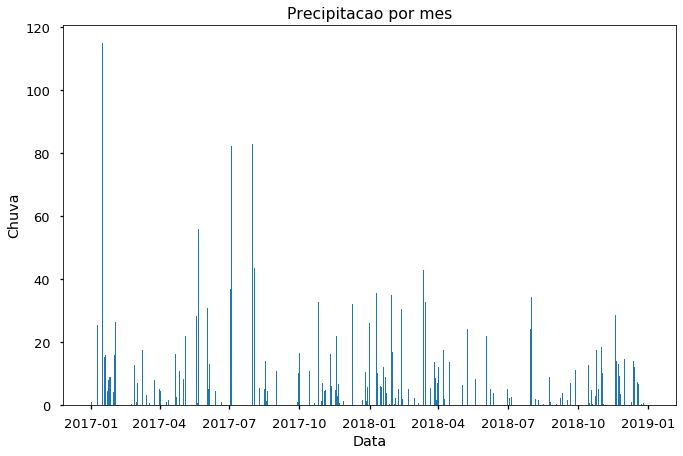

In [40]:

x = dfddDriscre.Data
y = dfddDriscre.Precipitacao

plt.bar(x, y)
plt.rcParams['figure.figsize'] = (14,10)
plt.xlabel("Data")
plt.ylabel("Chuva")
plt.title("Precipitacao por mes")
plt.show()

### Precipitação acumulada por mês (mm) 
<a id='insight01'></a>

In [42]:
dfdddata = dfddDriscre.copy()

dfdddata.index = dfdddata['Data'] 
dfdddata.groupby(by=[dfdddata.index.year,dfdddata.index.month], ).sum()

Hora  Precipitacao  TempMaxima  TempMinima  Insolacao  \
Data Data                                                           
2017 1     37200         328.5         0.0       551.6        0.0   
     2     33600          91.0         0.0       512.1        0.0   
     3     37200          60.9         0.0       506.9        0.0   
     4     36000          50.0         0.0       481.4        0.0   
     5     37200         175.2         0.0       499.2        0.0   
     6     36000         126.8         0.0       455.7        0.0   
     7     37200         187.0         0.0       433.1        0.0   
     8     37200         215.8         0.0       463.9        0.0   
     9     36000          33.1         0.0       512.5        0.0   
     10    37200          83.4         0.0       540.1        0.0   
     11    36000         148.6         0.0       512.8        0.0   
     12    37200         173.7         0.0       574.5        0.0   
2018 1     37200         277.3         0.0       589.6        0.0   
     2     33600         132.1         0.0       518.3        0.0   
     3     37200         192.5         0.0       594.1        0.0   
     4     36000          55.1         0.0       508.0        0.0   
     5     37200          42.1         0.0       460.1        0.0   
     6     36000          38.2         0.0       459.6        0.0   
     7     37200          42.5         0.0       464.5        0.0   
     8     37200          53.6         0.0       452.7        0.0   
     9     36000          79.5         0.0       500.3        0.0   
     10    37200          64.5         0.0       508.2        0.0   
     11    36000         107.0         0.0       525.7        0.0   
     12    37200          93.7         0.0       596.0        0.0   
2019 1      1200           0.0         0.0        18.7        0.0   

           Evaporacao Piche  Temp Comp Media  Umidade Relativa Media  \
Data Data                                                              
2017 1                  0.0              0.0                     0.0   
     2                  0.0              0.0                     0.0   
     3                  0.0              0.0                     0.0   
     4                  0.0              0.0                     0.0   
     5                  0.0              0.0                     0.0   
     6                  0.0              0.0                     0.0   
     7                  0.0              0.0                     0.0   
     8                  0.0              0.0                     0.0   
     9                  0.0              0.0                     0.0   
     10                 0.0              0.0                     0.0   
     11                 0.0              0.0                     0.0   
     12                 0.0              0.0                     0.0   
2018 1                  0.0              0.0                     0.0   
     2                  0.0              0.0                     0.0   
     3                  0.0              0.0                     0.0   
     4                  0.0              0.0                     0.0   
     5                  0.0              0.0                     0.0   
     6                  0.0              0.0                     0.0   
     7                  0.0              0.0                     0.0   
     8                  0.0              0.0                     0.0   
     9                  0.0              0.0                     0.0   
     10                 0.0              0.0                     0.0   
     11                 0.0              0.0                     0.0   
     12                 0.0              0.0                     0.0   
2019 1                  0.0              0.0                     0.0   

           Velocidade do Vento Media  Chuva  
Data Data                                    
2017 1                           0.0   14.0  
     2                           0.0    4.0  
     3             

In [11]:
dfddDriscre['Ano'], dfddDriscre['Mes'] = dfddDriscre['Data'].dt.year, dfddDriscre['Data'].dt.month


In [12]:
anos = [2017,2018]
meses=[1,2,3,4,5,6,7,8,9,10,11,12]
mesesString= ['janeiro','fevereiro','março','abril','maio','junho','julho','agosto','setembro','outubro','novembro','dezembro']
for ano in anos:
    for mes in meses:
        print("Total de precipitação em ",mesesString[mes-1]," de ",ano,": {:.2f}mm".format(dfddDriscre.query('Ano==2017 & Mes=={:.2f}'.format(mes)).sum()[1]))

Total de precipitação em  janeiro  de  2017 : 328.50mm
Total de precipitação em  fevereiro  de  2017 : 91.00mm
Total de precipitação em  março  de  2017 : 60.90mm
Total de precipitação em  abril  de  2017 : 50.00mm
Total de precipitação em  maio  de  2017 : 175.20mm
Total de precipitação em  junho  de  2017 : 126.80mm
Total de precipitação em  julho  de  2017 : 187.00mm
Total de precipitação em  agosto  de  2017 : 215.80mm
Total de precipitação em  setembro  de  2017 : 33.10mm
Total de precipitação em  outubro  de  2017 : 83.40mm
Total de precipitação em  novembro  de  2017 : 148.60mm
Total de precipitação em  dezembro  de  2017 : 173.70mm
Total de precipitação em  janeiro  de  2018 : 328.50mm
Total de precipitação em  fevereiro  de  2018 : 91.00mm
Total de precipitação em  março  de  2018 : 60.90mm
Total de precipitação em  abril  de  2018 : 50.00mm
Total de precipitação em  maio  de  2018 : 175.20mm
Total de precipitação em  junho  de  2018 : 126.80mm
Total de precipitação em  julho 

### Precipitação acumulada por ano (mm)
<a id='insight04'></a>

In [47]:
print("Total em 2017: {:.2f} mm".format(dfddDriscre.query('Chuva == 1 & Ano==2017').iloc[:,2:3].sum()[0] ))
print("Total em 2018: {:.2f} mm".format(dfddDriscre.query('Chuva == 1 & Ano==2018').iloc[:,2:3].sum()[0] ))

Total em 2017: 1647.60 mm
Total em 2018: 1134.10 mm


<a id='insight02'></a> 
### Dias com precipitação

In [13]:
anos = [2017,2018]
meses=[1,2,3,4,5,6,7,8,9,10,11,12]
mesesString= ['janeiro','fevereiro','março','abril','maio','junho','julho','agosto','setembro','outubro','novembro','dezembro']
for ano in anos:
    for mes in meses:
        print("Total de precipitação em ",mesesString[mes-1]," de ",ano,": {:.0f} dias".format(dfddDriscre.query('Chuva == 1 & Ano==2017 & Mes=={:.2f}'.format(mes)).count()[1]))


Total de precipitação em  janeiro  de  2017 : 14 dias
Total de precipitação em  fevereiro  de  2017 : 4 dias
Total de precipitação em  março  de  2017 : 6 dias
Total de precipitação em  abril  de  2017 : 6 dias
Total de precipitação em  maio  de  2017 : 7 dias
Total de precipitação em  junho  de  2017 : 6 dias
Total de precipitação em  julho  de  2017 : 5 dias
Total de precipitação em  agosto  de  2017 : 10 dias
Total de precipitação em  setembro  de  2017 : 3 dias
Total de precipitação em  outubro  de  2017 : 7 dias
Total de precipitação em  novembro  de  2017 : 13 dias
Total de precipitação em  dezembro  de  2017 : 11 dias
Total de precipitação em  janeiro  de  2018 : 14 dias
Total de precipitação em  fevereiro  de  2018 : 4 dias
Total de precipitação em  março  de  2018 : 6 dias
Total de precipitação em  abril  de  2018 : 6 dias
Total de precipitação em  maio  de  2018 : 7 dias
Total de precipitação em  junho  de  2018 : 6 dias
Total de precipitação em  julho  de  2018 : 5 dias
Tota

### Valores da média por Mês/Ano
<a id='insight03'></a>

In [52]:
dfdd.Data = pd.to_datetime(dfdd.Data) 
dfdd.dtypes
dfdd.groupby(by=[dfdd['Data'].dt.year,dfdd['Data'].dt.month]).mean().sort_values(by="TempMinima")

Hora  Precipitacao  TempMaxima  TempMinima  Insolacao  \
Data Data                                                          
2017 7      600      6.032258   24.303226   13.970968   5.980645   
2018 8      600      1.729032   24.100000   14.603226   4.783333   
     5      600      1.358065   24.109677   14.841935   5.800000   
2017 8      600      6.961290   24.400000   14.964516   4.687097   
2018 7      600      1.370968   25.264516   14.983871   5.358621   
2017 6      600      4.226667   23.813333   15.190000   5.536667   
2018 6      600      1.273333   24.100000   15.320000   4.541379   
2017 4      600      1.666667   24.800000   16.046667   4.500000   
     5      600      5.651613   24.125806   16.103226   4.716129   
     3      600      1.964516   25.980645   16.351613   5.735484   
2018 10     600      2.080645   25.345161   16.393548   4.144444   
     9      600      2.650000   26.366667   16.676667   5.430000   
     4      600      1.836667   25.713333   16.933333   6.048276   
2017 9      600      1.103333   28.400000   17.083333   7.653333   
     11     600      4.953333   27.590000   17.093333   6.370000   
     10     600      2.690323   26.661290   17.422581   4.977419   
2018 11     600      3.566667   26.833333   17.523333   5.567857   
2017 1      600     10.596774   26.145161   17.793548   4.190323   
     2      600      3.250000   28.589286   18.289286   7.175000   
2018 2      600      4.717857   26.957143   18.510714   4.381481   
2017 12     600      5.603226   27.603226   18.532258   5.248387   
2019 1      600      0.000000   31.800000   18.700000        NaN   
2018 1      600      8.945161   28.067742   19.019355   4.855172   
     3      600      6.209677   28.206452   19.164516   5.073333   
     12     600      3.022581   29.516129   19.225806   5.780000   

           Evaporacao Piche  Temp Comp Media  Umidade Relativa Media  \
Data Data                                                              
2017 7             3.764516        18.502581               71.350000   
2018 8             3.351613        18.621290               72.217742   
     5             3.493548        18.615484               72.822581   
2017 8             3.361290        19.089677               74.975806   
2018 7             4.051613        19.323226               69.209677   
2017 6             3.100000        18.757333               76.333333   
2018 6             3.406667        18.948000               73.041667   
2017 4             3.030000        19.827333               75.641667   
     5             3.500000        19.707742               77.911290   
     3             3.545161        20.609032               74.556452   
2018 10            3.283871        19.894194               77.983871   
     9             3.303333        20.510000               74.225000   
     4             3.563333        20.391333               72.608333   
2017 9             6.136667        21.790667               65.091667   
     11            4.693333        21.598000               71.133333   
     10            4.893548        21.423226               73.532258   
2018 11            3.553333        21.344667               72.416667   
2017 1             3.358065        21.582581               79.330645   
     2             4.760714        22.817857               68.053571   
2018 2             3.017857        21.953571               77.026786   
2017 12            4.074194        22.446452               73.306452   
2019 1             4.200000        24.480000               79.250000   
2018 1             3.945161        22.830968               76.475806   
     3             3.216129        22.553548               77.580645   
     12            4.532258        23.383226               69.895161   

           Velocidade do Vento Media  
Data Data                             
2017 7                      2.426882  
2018 8                      2.570968  
     5                      2.435484  
2017 8                      2.4483

<a id='insight06'></a> 
### Comportamento cíclico da média das features/ano
Nota-se um compotamento cíclico apesar de haver variação na média dos anos

In [53]:
dfdd.loc[dfdd['Data'].dt.year == 2017].mean()

Hora                         600.000000
Precipitacao                   4.586301
TempMaxima                    26.012055
TempMinima                    16.558356
Insolacao                      5.546027
Evaporacao Piche               4.009589
Temp Comp Media               20.663836
Umidade Relativa Media        73.500000
Velocidade do Vento Media      2.518541
dtype: float64

In [54]:
dfdd.loc[dfdd['Data'].dt.year == 2018].mean()

Hora                         600.000000
Precipitacao                   3.227671
TempMaxima                    26.213973
TempMinima                    16.923562
Insolacao                      5.140789
Evaporacao Piche               3.565479
Temp Comp Media               20.691507
Umidade Relativa Media        73.773288
Velocidade do Vento Media      2.469224
dtype: float64

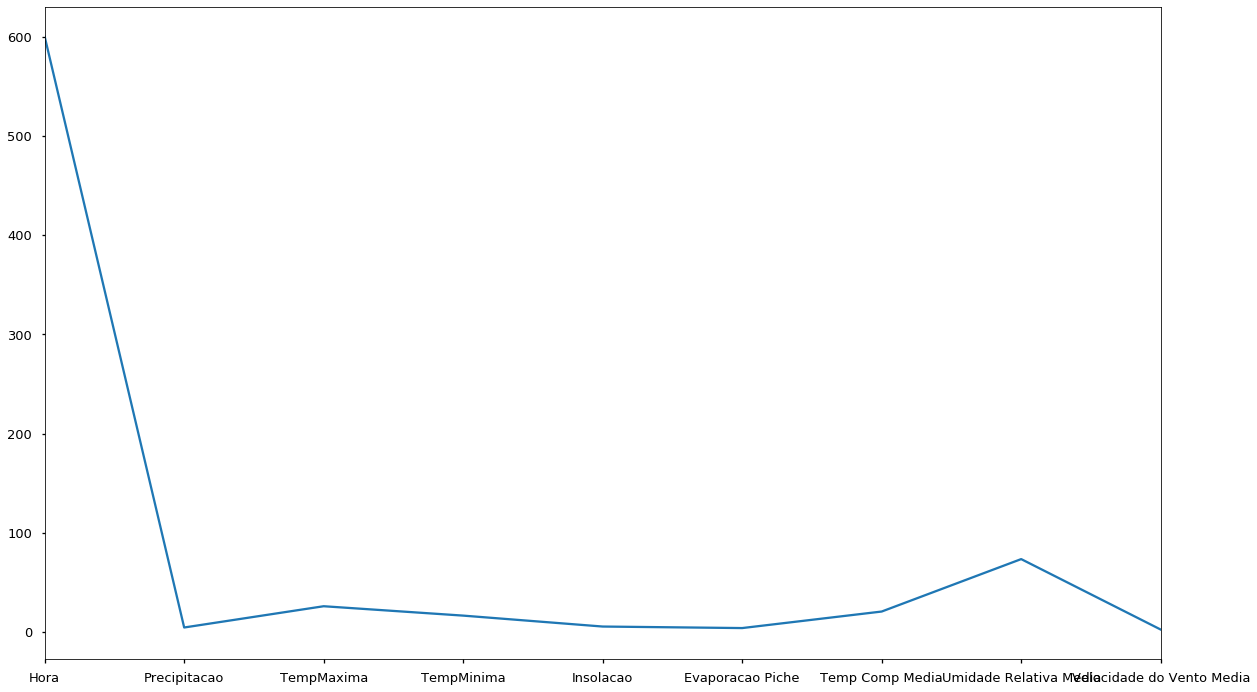

In [55]:
dfdd.loc[dfdd['Data'].dt.year == 2017].mean().plot(figsize=(20,12))

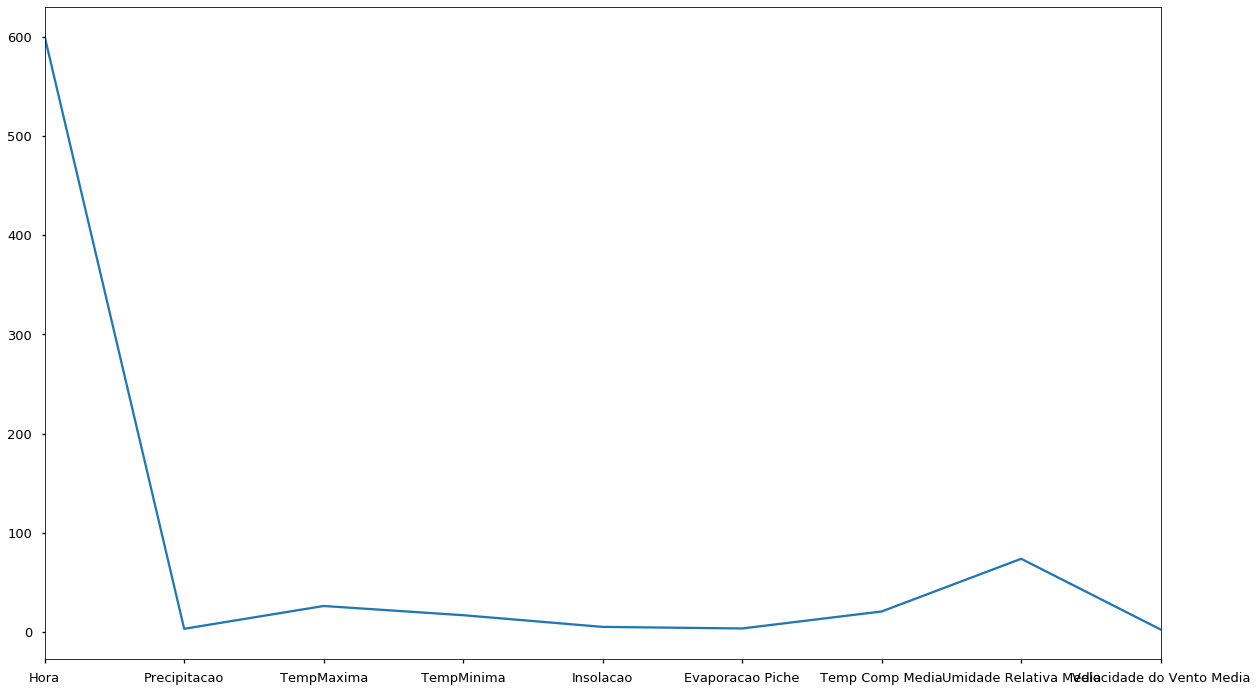

In [56]:
dfdd.loc[dfdd['Data'].dt.year == 2018].mean().plot(figsize=(20,12))

# 2) Pré-processamento


## Dataset sem imputação de dados

Para construir um dataset apenas com valores fornecidos utilizaremos a união dos dois dataset de dados_diarios.txt e dados_horarios.txt

In [59]:
dfdd = pd.read_csv('dados_diarios_semcab.txt', sep=";")
dfdd.drop(['Unnamed: 11','Estacao'], inplace=True, axis=1) # limpeza de colunas sem informacao

dfdh = pd.read_csv("dados_horarios_semcab.txt", sep = ";")
dfdh.drop(['Unnamed: 9','Unnamed: 10'], inplace=True, axis=1) # limpeza da coluna sem informacao

dfdd.Data = pd.to_datetime(dfdd.Data)
dfdh.Data = pd.to_datetime(dfdh.Data)

dfmerge = pd.merge(dfdd,dfdh,how='inner', on=['Data','Hora']) 

dfmerge.sort_values(by="Data")

dfmerge

,Data,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Estacao,TempBulboSeco,TempBulboUmido,UmidadeRelativa,PressaoAtmEstacao,DirecaoVento,VelocidadeVentoNebulosidade
0,2017-01-01,0,NaN,31.7,NaN,8.5,6.1,25.20,66.00,3.466667,83781,26.8,21.5,61,923.4,5,2.1
1,2017-01-01,1200,0.0,NaN,18.1,NaN,NaN,NaN,NaN,NaN,83781,26.2,21.2,63,924.7,32,3.3
2,2017-02-01,0,NaN,31.3,NaN,5.6,6.3,23.96,83.00,2.900000,83781,25.0,22.1,78,924.2,32,2.5
3,2017-02-01,1200,16.0,NaN,18.1,NaN,NaN,NaN,NaN,NaN,83781,24.8,21.3,72,924.2,5,3.3
4,2017-03-01,0,NaN,31.3,NaN,7.0,4.5,23.10,87.00,3.000000,83781,22.8,21.5,89,922.8,23,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,2018-12-30,1200,0.0,NaN,19.1,NaN,NaN,NaN,NaN,NaN,83781,23.2,20.4,76,922.6,23,1.3
1458,2018-12-31,0,NaN,31.0,NaN,NaN,5.2,24.20,66.00,2.633333,83781,23.5,20.3,74,923.1,18,2.0
1459,2018-12-31,1200,0.0,NaN,19.1,NaN,NaN,NaN,NaN,NaN,83781,24.0,19.7,67,923.6,9,1.0
1460,2019-01-01,0,NaN,31.8,NaN,NaN,4.2,24.48,79.25,2.300000,83781,23.4,20.3,75,923.1,9,3.6


In [60]:
dfpre=dfmerge.dropna(subset=["Precipitacao"])
dfpre

,Data,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Estacao,TempBulboSeco,TempBulboUmido,UmidadeRelativa,PressaoAtmEstacao,DirecaoVento,VelocidadeVentoNebulosidade
1,2017-01-01,1200,0.0,NaN,18.1,NaN,NaN,NaN,NaN,NaN,83781,26.2,21.2,63,924.7,32,3.3
3,2017-02-01,1200,16.0,NaN,18.1,NaN,NaN,NaN,NaN,NaN,83781,24.8,21.3,72,924.2,5,3.3
5,2017-03-01,1200,3.7,NaN,19.2,NaN,NaN,NaN,NaN,NaN,83781,24.6,21.5,76,925.1,14,3.0
7,2017-04-01,1200,5.0,NaN,18.8,NaN,NaN,NaN,NaN,NaN,83781,22.6,19.5,75,924.3,23,1.6
9,2017-05-01,1200,0.0,NaN,21.9,NaN,NaN,NaN,NaN,NaN,83781,25.8,21.5,67,926.0,32,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,2018-12-28,1200,0.0,NaN,18.9,NaN,NaN,NaN,NaN,NaN,83781,24.5,20.5,69,923.4,5,1.3
1455,2018-12-29,1200,2.6,NaN,18.8,NaN,NaN,NaN,NaN,NaN,83781,24.0,20.5,73,923.7,18,1.6
1457,2018-12-30,1200,0.0,NaN,19.1,NaN,NaN,NaN,NaN,NaN,83781,23.2,20.4,76,922.6,23,1.3
1459,2018-12-31,1200,0.0,NaN,19.1,NaN,NaN,NaN,NaN,NaN,83781,24.0,19.7,67,923.6,9,1.0


In [61]:
dfpre.drop(['Hora','TempMaxima','Insolacao','Evaporacao Piche', 'Temp Comp Media','Umidade Relativa Media','Velocidade do Vento Media','Estacao'], inplace=True, axis=1)

/Users/diogo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [62]:
dfpre

,Data,Precipitacao,TempMinima,TempBulboSeco,TempBulboUmido,UmidadeRelativa,PressaoAtmEstacao,DirecaoVento,VelocidadeVentoNebulosidade
1,2017-01-01,0.0,18.1,26.2,21.2,63,924.7,32,3.3
3,2017-02-01,16.0,18.1,24.8,21.3,72,924.2,5,3.3
5,2017-03-01,3.7,19.2,24.6,21.5,76,925.1,14,3.0
7,2017-04-01,5.0,18.8,22.6,19.5,75,924.3,23,1.6
9,2017-05-01,0.0,21.9,25.8,21.5,67,926.0,32,2.5
...,...,...,...,...,...,...,...,...,...
1453,2018-12-28,0.0,18.9,24.5,20.5,69,923.4,5,1.3
1455,2018-12-29,2.6,18.8,24.0,20.5,73,923.7,18,1.6
1457,2018-12-30,0.0,19.1,23.2,20.4,76,922.6,23,1.3
1459,2018-12-31,0.0,19.1,24.0,19.7,67,923.6,9,1.0


In [63]:
dfpre.to_csv("ddreais.csv") #salvando em ddreais.csv"

In [64]:
dfpre.Data = pd.to_datetime(dfpre.Data)

/Users/diogo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [65]:
dfpre.dtypes

Data                           datetime64[ns]
Precipitacao                          float64
TempMinima                            float64
TempBulboSeco                         float64
TempBulboUmido                        float64
UmidadeRelativa                         int64
PressaoAtmEstacao                     float64
DirecaoVento                            int64
VelocidadeVentoNebulosidade           float64
dtype: object

## Dataset com imputação dos valores ausentes

Esse tipo de dataset com imputação apresenta um viés forte da estratégia de utilizada para para a imputação
dos valores faltantes.

Técnicas de utilização de aprendizagem de máquina para essa imputação não fazem sentido como mencionado, pois a própria classe de interese está faltante em 50% dos dados.

Analisando o dataset dados_diarios_semcab.txt vemos um padrão que toda linha 2n+1 apresenta valor de "Precipitacao e TemMinima" e nas 2n os demais valores, com um merge dessas tuplas com valores de 00:00 e 12:00 teríamos um dataset sem tantos valores ausentes. Essa estratégia se baseia em considerar que não há variações climáticas bruscas de um dia para o outro.

Outra estratégia é considerar que esses dados apresentam baixa variação em seus valores antecessor e sucessor, visto  que, pelo desvio padrão e por apresentar um acréscimo e decréscimo sequencial utilizaremos a estratégia da interpolação para fugir da ideia de fazer um merge entre dois horários diferentes. Utilizaremos essa segunda estratégia de imputação.

In [66]:
dfdd = pd.read_csv('dados_diarios_semcab.txt', sep=";")
dfdd.drop(['Unnamed: 11','Estacao'], inplace=True, axis=1) # limpeza de colunas sem informacao
dfdd = dfdd.interpolate(method='linear', limit_direction='forward', axis=0)
dfdd

,Data,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media
0,01/01/2017,0,NaN,31.7,NaN,8.50,6.10,25.20,66.000,3.466667
1,01/01/2017,1200,0.00,31.5,18.10,7.05,6.20,24.58,74.500,3.183333
2,02/01/2017,0,8.00,31.3,18.10,5.60,6.30,23.96,83.000,2.900000
3,02/01/2017,1200,16.00,31.3,18.10,6.30,5.40,23.53,85.000,2.950000
4,03/01/2017,0,9.85,31.3,18.65,7.00,4.50,23.10,87.000,3.000000
...,...,...,...,...,...,...,...,...,...,...
1457,30/12/2018,1200,0.00,31.7,19.10,7.00,4.55,24.27,65.875,2.416667
1458,31/12/2018,0,0.00,31.0,19.10,7.00,5.20,24.20,66.000,2.633333
1459,31/12/2018,1200,0.00,31.4,19.10,7.00,4.70,24.34,72.625,2.466667
1460,01/01/2019,0,0.00,31.8,18.90,7.00,4.20,24.48,79.250,2.300000


Vamo retirar também "temp Com Media" como visto na Etapa de AED

In [67]:
dfdd.drop(['Temp Comp Media'], inplace=True, axis=1)

In [68]:
dfdd

,Data,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao Piche,Umidade Relativa Media,Velocidade do Vento Media
0,01/01/2017,0,NaN,31.7,NaN,8.50,6.10,66.000,3.466667
1,01/01/2017,1200,0.00,31.5,18.10,7.05,6.20,74.500,3.183333
2,02/01/2017,0,8.00,31.3,18.10,5.60,6.30,83.000,2.900000
3,02/01/2017,1200,16.00,31.3,18.10,6.30,5.40,85.000,2.950000
4,03/01/2017,0,9.85,31.3,18.65,7.00,4.50,87.000,3.000000
...,...,...,...,...,...,...,...,...,...
1457,30/12/2018,1200,0.00,31.7,19.10,7.00,4.55,65.875,2.416667
1458,31/12/2018,0,0.00,31.0,19.10,7.00,5.20,66.000,2.633333
1459,31/12/2018,1200,0.00,31.4,19.10,7.00,4.70,72.625,2.466667
1460,01/01/2019,0,0.00,31.8,18.90,7.00,4.20,79.250,2.300000


In [71]:
dfdh = pd.read_csv("dados_horarios_semcab.txt", sep = ";")
dfdh.drop(['Unnamed: 9','Unnamed: 10'], inplace=True, axis=1) # limpeza da coluna sem informacao


dfdd.Data = pd.to_datetime(dfdd.Data)
dfdh.Data = pd.to_datetime(dfdh.Data)

dfmergeimp = pd.merge(dfdd,dfdh,how='inner', on=['Data','Hora']) 

dfmergeimp.sort_values(by="Data")


,Data,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao Piche,Umidade Relativa Media,Velocidade do Vento Media,Estacao,TempBulboSeco,TempBulboUmido,UmidadeRelativa,PressaoAtmEstacao,DirecaoVento,VelocidadeVentoNebulosidade
0,2017-01-01,0,NaN,31.7,NaN,8.50,6.10,66.000,3.466667,83781,26.8,21.5,61,923.4,5,2.1
1,2017-01-01,1200,0.0,31.5,18.10,7.05,6.20,74.500,3.183333,83781,26.2,21.2,63,924.7,32,3.3
63,2017-01-02,1200,1.0,27.3,18.60,2.45,3.00,78.500,2.200000,83781,22.0,19.9,82,925.2,14,3.3
62,2017-01-02,0,2.6,27.6,18.65,0.60,3.80,83.250,1.933333,83781,23.4,20.7,79,925.6,14,1.6
119,2017-01-03,1200,0.0,29.8,20.70,7.60,5.70,68.625,3.016667,83781,24.8,20.0,63,921.3,14,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,2018-12-30,1200,0.0,31.7,19.10,7.00,4.55,65.875,2.416667,83781,23.2,20.4,76,922.6,23,1.3
1458,2018-12-31,0,0.0,31.0,19.10,7.00,5.20,66.000,2.633333,83781,23.5,20.3,74,923.1,18,2.0
1459,2018-12-31,1200,0.0,31.4,19.10,7.00,4.70,72.625,2.466667,83781,24.0,19.7,67,923.6,9,1.0
1460,2019-01-01,0,0.0,31.8,18.90,7.00,4.20,79.250,2.300000,83781,23.4,20.3,75,923.1,9,3.6


In [72]:
dfmergeimp.to_csv("dfimput.csv") #salvando em ddreais.csv"

# 3) Etapas do machine learning


## Carregamento dos Dataset

In [75]:
dfimput = pd.read_csv("dfimput.csv", sep = ",")

In [77]:
dfimput.drop(['Unnamed: 0','Estacao'], inplace=True, axis=1) # limpeza da coluna sem informacao
dfimput

,Data,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao Piche,Umidade Relativa Media,Velocidade do Vento Media,TempBulboSeco,TempBulboUmido,UmidadeRelativa,PressaoAtmEstacao,DirecaoVento,VelocidadeVentoNebulosidade
0,2017-01-01,0,NaN,31.7,NaN,8.50,6.10,66.000,3.466667,26.8,21.5,61,923.4,5,2.1
1,2017-01-01,1200,0.00,31.5,18.10,7.05,6.20,74.500,3.183333,26.2,21.2,63,924.7,32,3.3
2,2017-02-01,0,8.00,31.3,18.10,5.60,6.30,83.000,2.900000,25.0,22.1,78,924.2,32,2.5
3,2017-02-01,1200,16.00,31.3,18.10,6.30,5.40,85.000,2.950000,24.8,21.3,72,924.2,5,3.3
4,2017-03-01,0,9.85,31.3,18.65,7.00,4.50,87.000,3.000000,22.8,21.5,89,922.8,23,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,2018-12-30,1200,0.00,31.7,19.10,7.00,4.55,65.875,2.416667,23.2,20.4,76,922.6,23,1.3
1458,2018-12-31,0,0.00,31.0,19.10,7.00,5.20,66.000,2.633333,23.5,20.3,74,923.1,18,2.0
1459,2018-12-31,1200,0.00,31.4,19.10,7.00,4.70,72.625,2.466667,24.0,19.7,67,923.6,9,1.0
1460,2019-01-01,0,0.00,31.8,18.90,7.00,4.20,79.250,2.300000,23.4,20.3,75,923.1,9,3.6


In [79]:

dfreais = pd.read_csv("ddreais.csv", sep = ",")
dfreais.drop(['Unnamed: 0'], inplace=True, axis=1) # limpeza da coluna sem informacao
dfreais

,Data,Precipitacao,TempMinima,TempBulboSeco,TempBulboUmido,UmidadeRelativa,PressaoAtmEstacao,DirecaoVento,VelocidadeVentoNebulosidade
0,2017-01-01,0.0,18.1,26.2,21.2,63,924.7,32,3.3
1,2017-02-01,16.0,18.1,24.8,21.3,72,924.2,5,3.3
2,2017-03-01,3.7,19.2,24.6,21.5,76,925.1,14,3.0
3,2017-04-01,5.0,18.8,22.6,19.5,75,924.3,23,1.6
4,2017-05-01,0.0,21.9,25.8,21.5,67,926.0,32,2.5
...,...,...,...,...,...,...,...,...,...
726,2018-12-28,0.0,18.9,24.5,20.5,69,923.4,5,1.3
727,2018-12-29,2.6,18.8,24.0,20.5,73,923.7,18,1.6
728,2018-12-30,0.0,19.1,23.2,20.4,76,922.6,23,1.3
729,2018-12-31,0.0,19.1,24.0,19.7,67,923.6,9,1.0


## Discretização 

Poderíamos usar os valores reais em "mm" da precipitação ou então discretizar de acordo com o tipo de precipitação, por exemplo: 

#### Classificação por intensidade da chuva

classes: Dia Seco (DS): P < 2,2;

Chuva muito fraca (Cmf): 2,2 ≤ P < 4,2;

Chuva fraca (Cf): 4,2 ≤ P < 8,4;

Chuva Moderada (CM): 8,4 ≤ P < 18,6;

Chuva Forte (CF): 18,6 ≤ P < 55,3;

Chuva Muito Forte (CMF): P ≥ 55,3.

fonte :https://periodicos.ufpe.br/revistas/rbgfe/article/view/232788

### Entretanto vamos apenas focar no escopo do projeto que é responder qual a probabilidade de chover em um certo dia, dada as condições climáticas.

In [80]:

for index, row in dfreais.iterrows():   # Substitui os valores da coluna Precipitacao por SIM se valor > 0 e NAO se menos
    if row['Precipitacao'] > 2.2:
         dfreais.loc[index,'Precipitacao'] =  "chuva" 

    else:
         dfreais.loc[index,'Precipitacao'] =  "seco"
            
dfreais

,Data,Precipitacao,TempMinima,TempBulboSeco,TempBulboUmido,UmidadeRelativa,PressaoAtmEstacao,DirecaoVento,VelocidadeVentoNebulosidade
0,2017-01-01,seco,18.1,26.2,21.2,63,924.7,32,3.3
1,2017-02-01,chuva,18.1,24.8,21.3,72,924.2,5,3.3
2,2017-03-01,chuva,19.2,24.6,21.5,76,925.1,14,3.0
3,2017-04-01,chuva,18.8,22.6,19.5,75,924.3,23,1.6
4,2017-05-01,seco,21.9,25.8,21.5,67,926.0,32,2.5
...,...,...,...,...,...,...,...,...,...
726,2018-12-28,seco,18.9,24.5,20.5,69,923.4,5,1.3
727,2018-12-29,chuva,18.8,24.0,20.5,73,923.7,18,1.6
728,2018-12-30,seco,19.1,23.2,20.4,76,922.6,23,1.3
729,2018-12-31,seco,19.1,24.0,19.7,67,923.6,9,1.0


In [81]:

for index, row in dfimput.iterrows():   # Substitui os valores da coluna Precipitacao por SIM se valor > 0 e NAO se menos
    if row['Precipitacao'] > 2.2:
         dfimput.loc[index,'Precipitacao'] =  "chuva" 

    else:
         dfimput.loc[index,'Precipitacao'] =  "seco"
            
dfimput

,Data,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao Piche,Umidade Relativa Media,Velocidade do Vento Media,TempBulboSeco,TempBulboUmido,UmidadeRelativa,PressaoAtmEstacao,DirecaoVento,VelocidadeVentoNebulosidade
0,2017-01-01,0,seco,31.7,NaN,8.50,6.10,66.000,3.466667,26.8,21.5,61,923.4,5,2.1
1,2017-01-01,1200,seco,31.5,18.10,7.05,6.20,74.500,3.183333,26.2,21.2,63,924.7,32,3.3
2,2017-02-01,0,chuva,31.3,18.10,5.60,6.30,83.000,2.900000,25.0,22.1,78,924.2,32,2.5
3,2017-02-01,1200,chuva,31.3,18.10,6.30,5.40,85.000,2.950000,24.8,21.3,72,924.2,5,3.3
4,2017-03-01,0,chuva,31.3,18.65,7.00,4.50,87.000,3.000000,22.8,21.5,89,922.8,23,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,2018-12-30,1200,seco,31.7,19.10,7.00,4.55,65.875,2.416667,23.2,20.4,76,922.6,23,1.3
1458,2018-12-31,0,seco,31.0,19.10,7.00,5.20,66.000,2.633333,23.5,20.3,74,923.1,18,2.0
1459,2018-12-31,1200,seco,31.4,19.10,7.00,4.70,72.625,2.466667,24.0,19.7,67,923.6,9,1.0
1460,2019-01-01,0,seco,31.8,18.90,7.00,4.20,79.250,2.300000,23.4,20.3,75,923.1,9,3.6


## Balanceamento dos dados

O ideia é deixar o dataset balanceado como mostrado abaixo,
fazendo um <i>Undersampling</i> perdemos muitas instâncias e, por outro lado, se
usarmos o <i>oversampling</i> podemos influenciar demais na etapa de aprendizado.
Nos casos de dataset que necessitam de balanceamento, a porcentagem das 
classes também sao fatores de <i>tuning</i>.

Neste caso, devido à grande queda de instância, provalvemente seria
melhor o uso de um algoritmo mais robusto à classe desbalanceadas como, baseados
no paradgma simbólico ou modelos que fazem essa penalização como penalized-SVM e penalized-LDA

In [82]:
print(dfimput.groupby('Precipitacao').size())

Precipitacao
chuva     419
seco     1043
dtype: int64


In [83]:
print(dfreais.groupby('Precipitacao').size())

Precipitacao
chuva    175
seco     556
dtype: int64


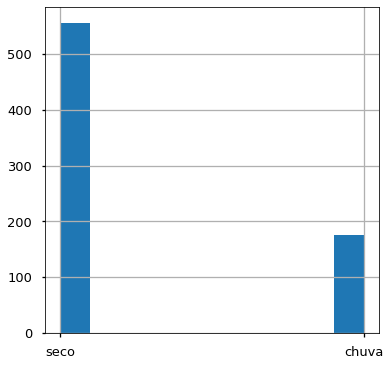

In [92]:

dfreais['Precipitacao'].hist(figsize=(6,6)) # classes totalmente desbalanceada
plt.show()

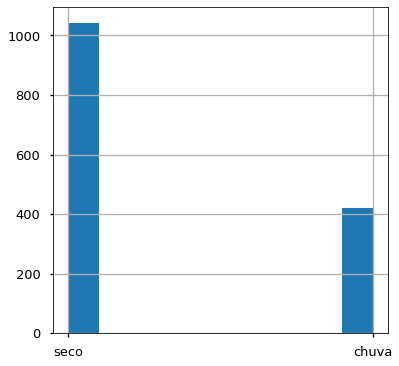

In [93]:
dfimput['Precipitacao'].hist(figsize=(6,6)) # classes totalmente desbalanceada
plt.show()

Como visto pelos histogramas temos muita instância da classe seco e pouca da classe chuva.

Random under-sampling:
seco     419
chuva    419
Name: Precipitacao, dtype: int64


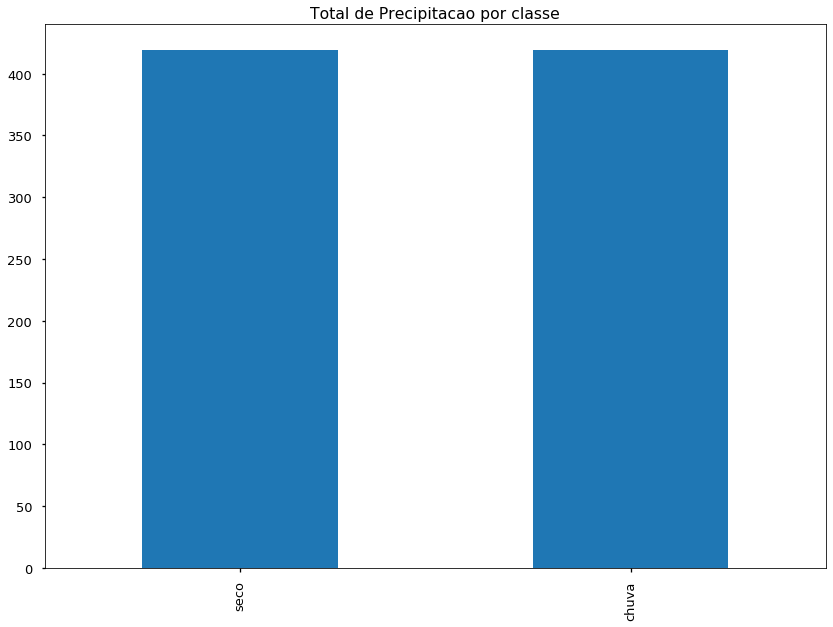

In [97]:
count_class_0, count_class_1 = dfimput.Precipitacao.value_counts()

df_class_0 = dfimput[dfimput['Precipitacao'] == "seco"]
df_class_1 = dfimput[dfimput['Precipitacao'] == "chuva"]



df_class_0_under = df_class_0.sample(count_class_1)
dfimput_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(dfimput_under.Precipitacao.value_counts())

dfimput_under.Precipitacao.value_counts().plot(kind='bar', title='Total de Precipitacao por classe');

Random under-sampling:
seco     175
chuva    175
Name: Precipitacao, dtype: int64


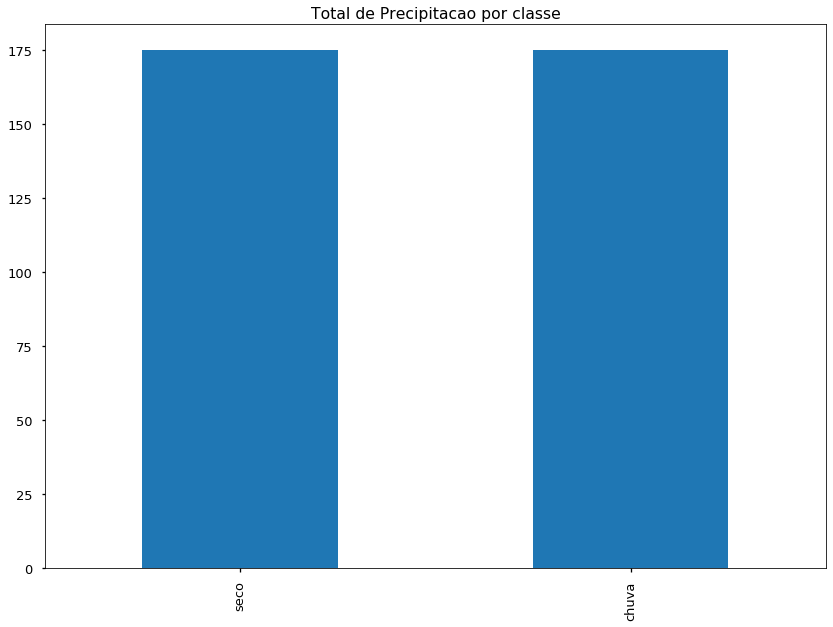

In [98]:
count_class_0, count_class_1 = dfreais.Precipitacao.value_counts()

df_class_0 = dfreais[dfreais['Precipitacao'] == "seco"]
df_class_1 = dfreais[dfreais['Precipitacao'] == "chuva"]



df_class_0_under = df_class_0.sample(count_class_1)
dfreais_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(dfreais_under.Precipitacao.value_counts())

dfreais_under.Precipitacao.value_counts().plot(kind='bar', title='Total de Precipitacao por classe');

### Importação da biblioteca 

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC




### Split do dataset

### Escolha entre A)(real) ou B)(artificial) :
##### A) Dataset sem imputação dos valores ausentes

In [187]:
array = dfreais_under.values

X = array[:,2:9]
y = array[:,1] 

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

##### b) Dataset com imputação dos valores ausentes

In [170]:

array = dfimput_under.values

X = array[:,3:14]
y = array[:,2] 

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

### Elaboração do model

In [178]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.721045 (0.066518)
LDA: 0.720525 (0.068704)
KNN: 0.662844 (0.112901)
CART: 0.627851 (0.074461)
NB: 0.681988 (0.049537)
SVM: 0.552189 (0.073135)


### Comparação dos modelos

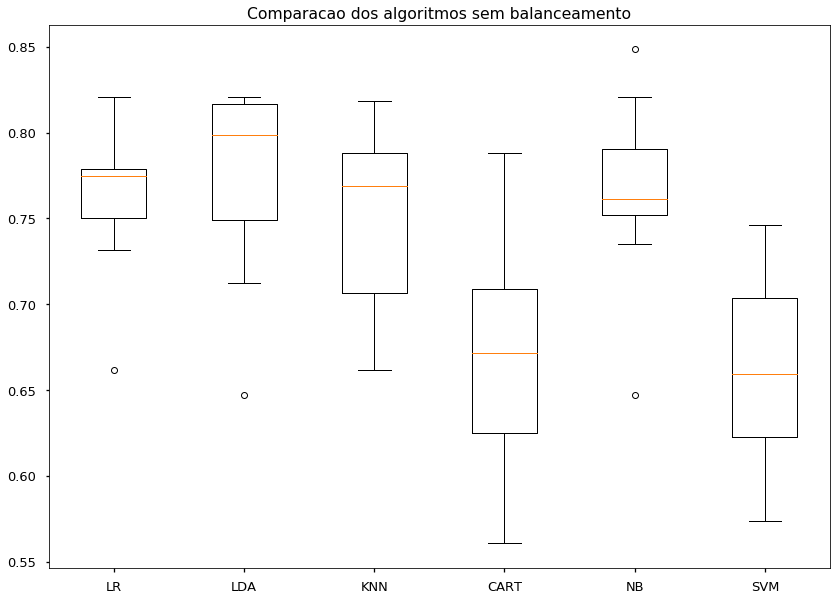

In [172]:
pyplot.boxplot(results, labels=names)
pyplot.title('Comparacao dos algoritmos sem balanceamento')
pyplot.show()

In [183]:
model = LogisticRegression(solver='liblinear', multi_class='ovr')

model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7857142857142857
[[31  6]
 [ 9 24]]
              precision    recall  f1-score   support

       chuva       0.78      0.84      0.81        37
        seco       0.80      0.73      0.76        33

    accuracy                           0.79        70
   macro avg       0.79      0.78      0.78        70
weighted avg       0.79      0.79      0.78        70



## Predição 

In [186]:

Xnew = [[14.0,15.0,14.7,97,934.7,18,3.3]]
# make a prediction
ynew = model.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[14.0, 15.0, 14.7, 97, 934.7, 18, 3.3], Predicted=chuva


## Considerações Finais
 
O banco de dados sem imputação dos dados ausentes, apesar de ser um dataset pequeno, feito com apenas dados fornecidos e apresentar um desempenho minimamente pior, ainda seria elegível, pois não tivemos ganhos tão significativos a ponto de valer a pena correr o risco de ter um model tendencioso.